<a href="https://colab.research.google.com/github/jedcael006/hi/blob/main/Tomato_plant_disease_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Python, TensorFlow and Keras libraries.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
import cv2
import glob
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, precision_score

Load Plant Village Dataset.

In [ ]:
!git clone https://github.com/spMohanty/PlantVillage-Dataset

Cloning into 'PlantVillage-Dataset'...
remote: Enumerating objects: 163235, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 163235 (delta 2), reused 0 (delta 0), pack-reused 163229 (from 1)
Receiving objects: 100% (163235/163235), 2.00 GiB | 30.09 MiB/s, done.
Resolving deltas: 100% (101/101), done.
Updating files: 100% (182401/182401), done.


Create empty lists for tomato leaf images (X) and labels(Y) for testing.

In [ ]:
X=[]
Y=[]

Create and sort list of label names.

In [ ]:
label=[]

In [ ]:
for i in range (10):
  label.append(1)

In [ ]:
label[0]='Tomato___healthy'
label[1]='Tomato___Tomato_mosaic_virus'
label[2]='Tomato___Tomato_Yellow_Leaf_Curl_Virus'
label[3]='Tomato___Target_Spot'
label[4]='Tomato___Spider_mites Two-spotted_spider_mite'
label[5]='Tomato___Septoria_leaf_spot'
label[6]='Tomato___Leaf_Mold'
label[7]='Tomato___Late_blight'
label[8]='Tomato___Early_blight'
label[9]='Tomato___Bacterial_spot'

In [ ]:
label.sort()

In [ ]:
print(label)

['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


Path for Tomato dataset.

In [ ]:
# Define the source directory and the new directory
source_dir = 'PlantVillage-Dataset/raw/color'
new_dir = 'PlantVillage-Dataset/raw/color/Tomato'

# Create the new directory if it doesn't exist
os.makedirs(new_dir, exist_ok=True)

# Define the files to move
files_to_move = ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

# Loop through the files and move them to the new directory
for file in files_to_move:
    source_path = os.path.join(source_dir, file)
    destination_path = os.path.join(new_dir, file)

    # Use shutil.move to move the files
    try:
        shutil.move(source_path, destination_path)
        print(f"Moved '{file}' to '{destination_path}'")
    except FileNotFoundError:
        print(f"Error: '{source_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

Moved 'Tomato___Bacterial_spot' to 'PlantVillage-Dataset/raw/color/Tomato/Tomato___Bacterial_spot'
Moved 'Tomato___Early_blight' to 'PlantVillage-Dataset/raw/color/Tomato/Tomato___Early_blight'
Moved 'Tomato___Late_blight' to 'PlantVillage-Dataset/raw/color/Tomato/Tomato___Late_blight'
Moved 'Tomato___Leaf_Mold' to 'PlantVillage-Dataset/raw/color/Tomato/Tomato___Leaf_Mold'
Moved 'Tomato___Septoria_leaf_spot' to 'PlantVillage-Dataset/raw/color/Tomato/Tomato___Septoria_leaf_spot'
Moved 'Tomato___Spider_mites Two-spotted_spider_mite' to 'PlantVillage-Dataset/raw/color/Tomato/Tomato___Spider_mites Two-spotted_spider_mite'
Moved 'Tomato___Target_Spot' to 'PlantVillage-Dataset/raw/color/Tomato/Tomato___Target_Spot'
Moved 'Tomato___Tomato_Yellow_Leaf_Curl_Virus' to 'PlantVillage-Dataset/raw/color/Tomato/Tomato___Tomato_Yellow_Leaf_Curl_Virus'
Moved 'Tomato___Tomato_mosaic_virus' to 'PlantVillage-Dataset/raw/color/Tomato/Tomato___Tomato_mosaic_virus'
Moved 'Tomato___healthy' to 'PlantVillage-D

In [ ]:
a='/content/PlantVillage-Dataset/raw/color/Tomato'
c='*.*'

Load and preprocess small set of 50 images, 5 of each category for test dataset.

In [ ]:
for i in range (10):
  b=label[i]
  path=os.path.join(a,b,c)
  image1= [cv2.imread(file) for file in glob.glob(path)]
  for j in range (5):
    image2 = cv2.resize(image1[j], dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
    X.append(image2)
    out=i
    Y.append(out)

In [ ]:
len(X)

50

In [ ]:
X=np.array(X)/255.0

In [ ]:
Y=np.array(Y)

Set up dataset generator as flow from directory.

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, rotation_range=45,
                    width_shift_range=.15, height_shift_range=.15,
                    horizontal_flip=True,  zoom_range=0.5)

In [ ]:
train_generator=train_datagen.flow_from_directory('/content/PlantVillage-Dataset/raw/color/Tomato',target_size=(224, 224),
        batch_size=32,
        class_mode='sparse')

Found 18160 images belonging to 10 classes.


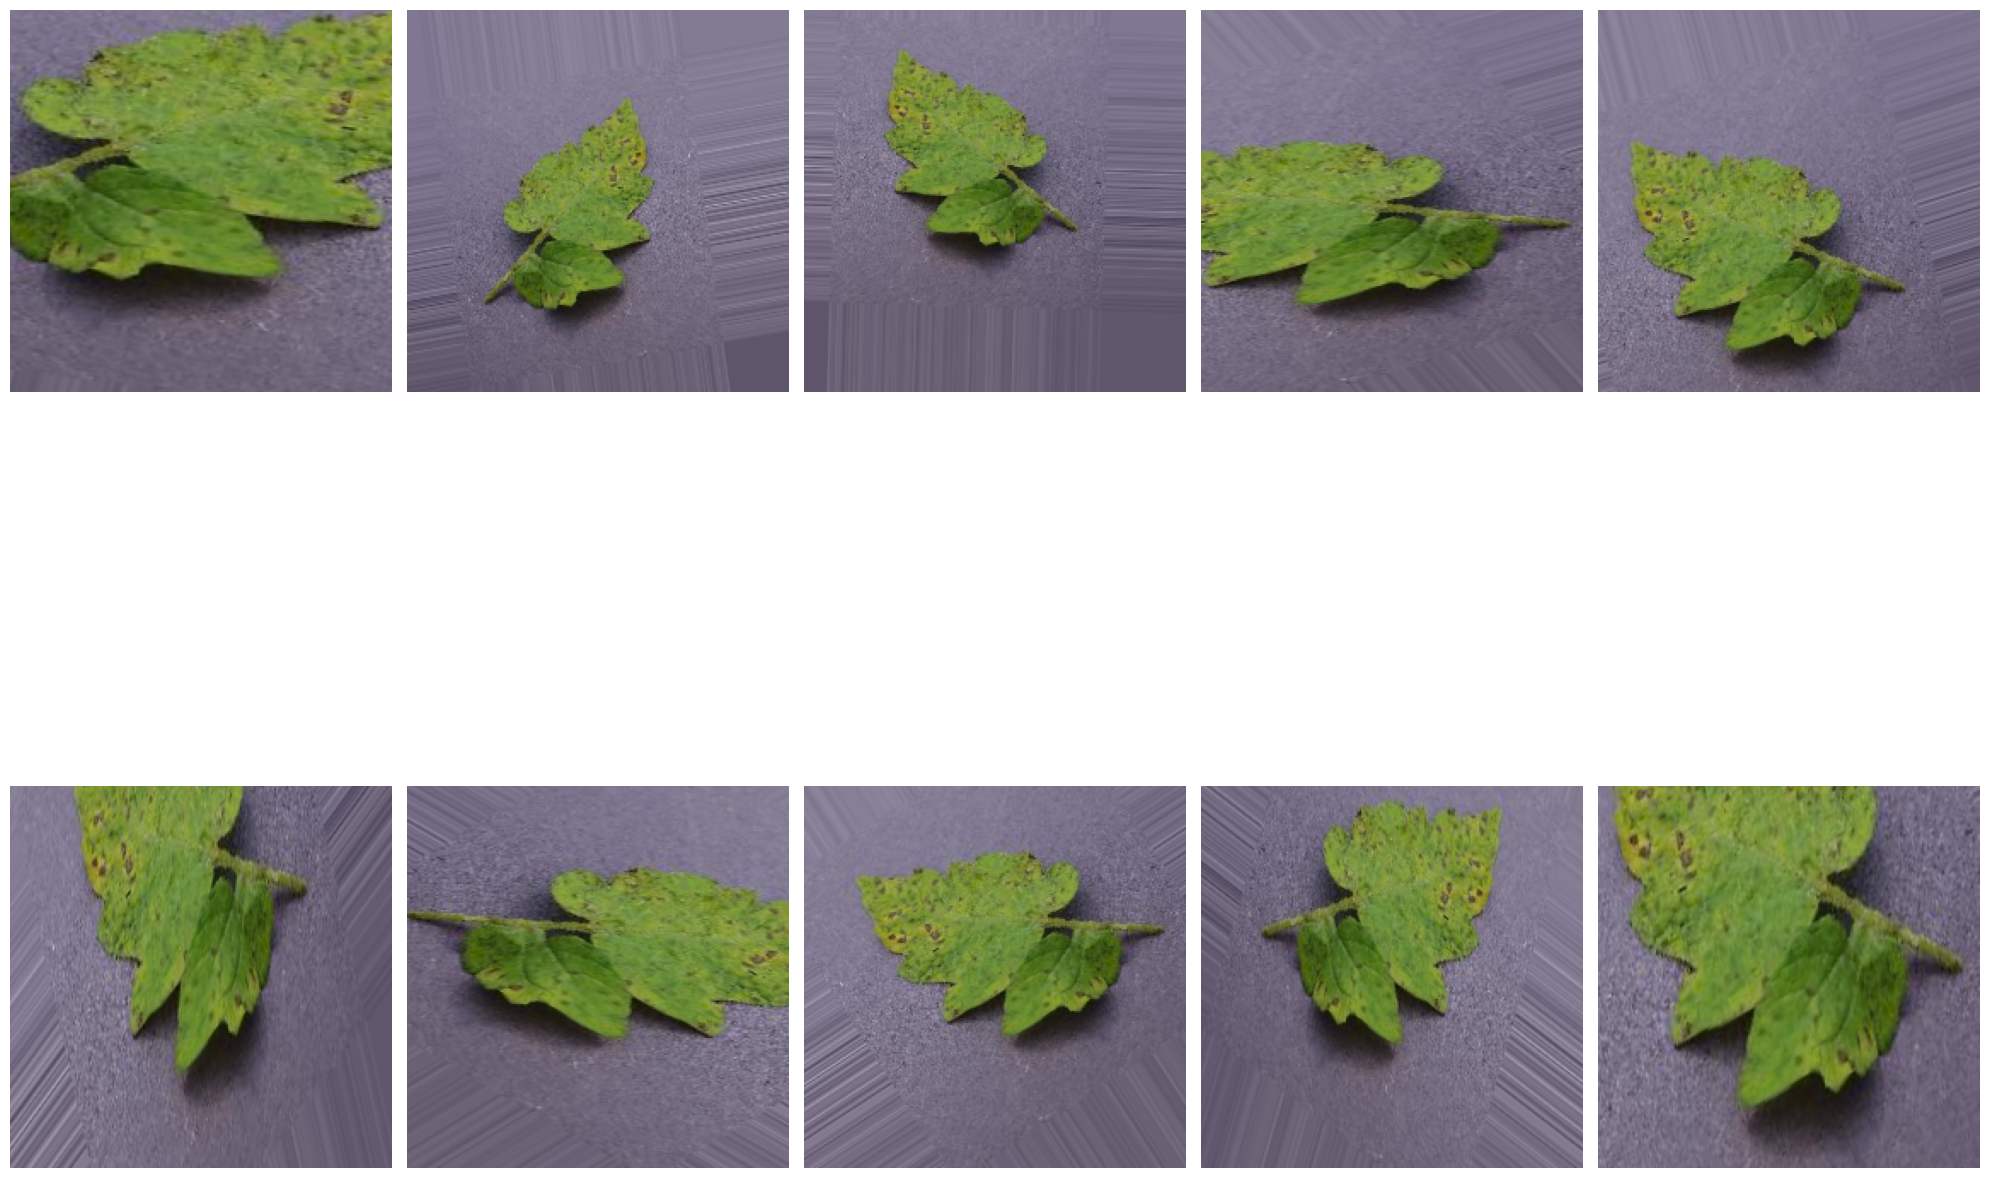

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(2, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

augmented_images = [train_generator[0][0][2] for i in range(10)]
plotImages(augmented_images)

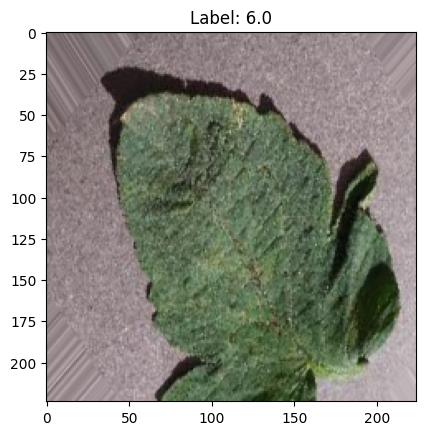

In [ ]:
import matplotlib.pyplot as plt

# Get a batch of images and labels from the generator
images, labels = next(train_generator)

# Choose an image from the batch to display
image_index = 1  # You can change this to view a different image

# Display the image
plt.imshow(images[image_index])
plt.title(f"Label: {labels[image_index]}")
plt.show()

In [ ]:
print(train_generator.class_indices)

{'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9}


Build the model

In [ ]:
baseModel = VGG16(weights="imagenet", include_top=False,input_shape=(224,224,3))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for layer in baseModel.layers:
	layer.trainable = False

In [ ]:
headModel = baseModel.output
headModel = GlobalAveragePooling2D() (headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dense(10, activation="softmax")(headModel)

In [ ]:
model = Model(inputs=baseModel.input, outputs=headModel)

Compile the model


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          32,8

 Total params: 14,748,170 (56.26 MB)

 Trainable params: 33,482 (130.79 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Train the model

In [ ]:
model.fit(train_generator,
        steps_per_epoch=500,
        epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 240s 451ms/step - accuracy: 0.3658 - loss: 1.8703
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 30s 59ms/step - accuracy: 0.6060 - loss: 1.2203  
Epoch 3/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


500/500 ━━━━━━━━━━━━━━━━━━━━ 273s 437ms/step - accuracy: 0.6299 - loss: 1.1409
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 29s 58ms/step - accuracy: 0.6860 - loss: 0.9564  
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 233s 438ms/step - accuracy: 0.6876 - loss: 0.9360
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 30s 59ms/step - accuracy: 0.7219 - loss: 0.8465  
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 235s 443ms/step - accuracy: 0.7179 - loss: 0.8416
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 29s 58ms/step - accuracy: 0.7345 - loss: 0.8112  
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 220s 441ms/step - accuracy: 0.7488 - loss: 0.7763
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 30s 59ms/step - accuracy: 0.7577 - loss: 0.7325  


In [ ]:
#model.save('model.h5')

In [ ]:
#model=load_model('model.h5')

Evaluate the model

In [ ]:
model.evaluate(X,Y)

2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 8s/step - accuracy: 0.6854 - loss: 0.9428


[0.9329323768615723, 0.699999988079071]

Make predictions

In [ ]:
p=model.predict(X)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step


In [ ]:
y_pred = p
y_true = Y
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate precision for each class
precision_per_class = precision_score(y_true, y_pred_classes, average=None)

# Print precision for each class
for i, precision in enumerate(precision_per_class):
    print(f"Precision for class {i}: {precision:.2f}")

# Calculate overall precision (macro or weighted average if needed)
macro_precision = precision_score(y_true, y_pred_classes, average='macro')
print(f"Overall Precision (Macro Average): {macro_precision:.2f}")

Confusion Matrix:
[[5 0 0 0 0 0 0 0 0 0]
 [3 1 1 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 1 0 1 2 0 0 1 0 0]
 [0 0 1 0 4 0 0 0 0 0]
 [0 0 0 0 1 3 1 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 1 0 4 0 0]
 [0 0 0 1 0 0 0 0 4 0]
 [0 0 0 0 0 1 1 0 0 3]]
Precision for class 0: 0.62
Precision for class 1: 0.50
Precision for class 2: 0.71
Precision for class 3: 0.50
Precision for class 4: 0.57
Precision for class 5: 0.60
Precision for class 6: 0.71
Precision for class 7: 0.80
Precision for class 8: 1.00
Precision for class 9: 1.00
Overall Precision (Macro Average): 0.70


Verify prediction

Make a selection

In [ ]:
s=11

In [ ]:
pred=p[s]
print(pred)

[1.2333711e-02 1.7076112e-02 7.9164433e-01 3.4886622e-03 4.9762172e-03
 2.0662395e-04 2.1554221e-04 1.6952632e-01 3.2900070e-04 2.0355268e-04]


In [ ]:
m1=np.argmax(pred)
l1=label[m1]
print('prediction :',l1)

prediction : Tomato___Late_blight


In [ ]:
m2=Y[s]
l2=label[m2]
print('actual :',l2)

actual : Tomato___Late_blight


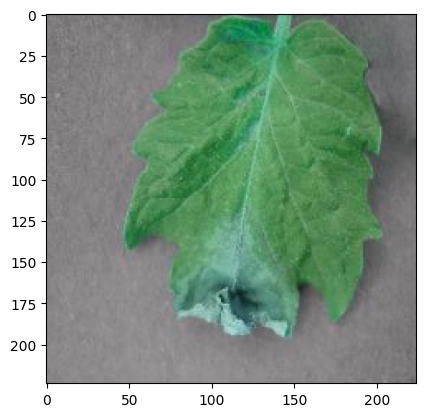

In [ ]:
plt.imshow(X[s])